## Titanic Classification

In [2]:
##Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Data collection

In [4]:
titanic_df=pd.read_csv(r'titanic.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Data preprocessing

In [6]:
titanic_df.shape

(891, 12)

In [7]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
null_percentage=(titanic_df.isnull().sum()/len(titanic_df))*100
null_percentage

PassengerId     0.000000
Survived        0.000000
Pclass          0.000000
Name            0.000000
Sex             0.000000
Age            19.865320
SibSp           0.000000
Parch           0.000000
Ticket          0.000000
Fare            0.000000
Cabin          77.104377
Embarked        0.224467
dtype: float64

In [10]:
print(titanic_df.groupby('Pclass').count())

        PassengerId  Survived  Name  Sex  Age  SibSp  Parch  Ticket  Fare  \
Pclass                                                                      
1               216       216   216  216  186    216    216     216   216   
2               184       184   184  184  173    184    184     184   184   
3               491       491   491  491  355    491    491     491   491   

        Cabin  Embarked  
Pclass                   
1         176       214  
2          16       184  
3          12       491  


In [11]:
print(titanic_df[['Pclass','Survived']].groupby('Pclass').mean())


        Survived
Pclass          
1       0.629630
2       0.472826
3       0.242363


In [12]:
#Let us put it in proper %age fromat
print(round(titanic_df[['Pclass','Survived']].groupby(['Pclass']).mean()*100,1))

        Survived
Pclass          
1           63.0
2           47.3
3           24.2


In [13]:
print(round(titanic_df[['Sex','Pclass','Survived']].groupby(['Pclass','Sex']).mean()*100,1))

               Survived
Pclass Sex             
1      female      96.8
       male        36.9
2      female      92.1
       male        15.7
3      female      50.0
       male        13.5


## Handling the missing values


In [15]:
titanic_df=titanic_df.drop(columns='Cabin',axis=1)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [16]:
## Replacing the missing values in 'Age' column with mean
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)

In [17]:
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0],inplace=True)

In [18]:
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

## Data Analysis

In [20]:
# #Getting statistical measures about the data
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [21]:
#Finding the no.of people surivevd and not survived
titanic_df['Survived'].value_counts()

Survived
0    549
1    342
Name: count, dtype: int64

### Data Visualizations

<Axes: xlabel='Survived', ylabel='count'>

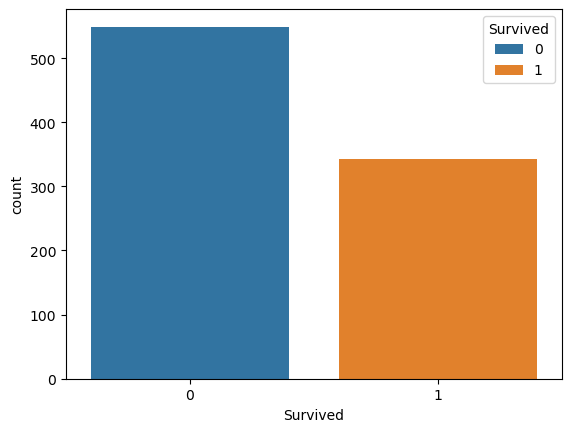

In [23]:
## Count plot for survived colums
sns.countplot(x='Survived',data=titanic_df,hue='Survived')

In [24]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='count'>

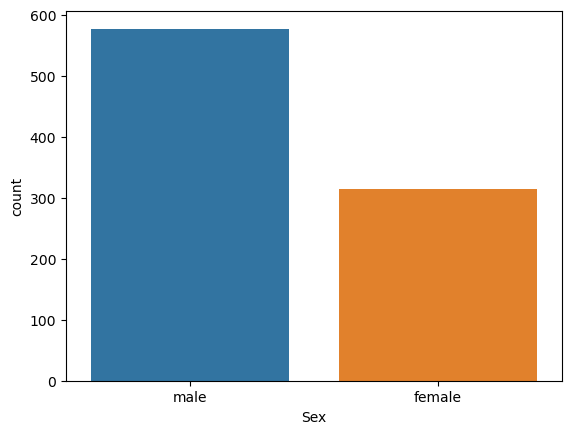

In [25]:
sns.countplot(x='Sex',data=titanic_df,hue='Sex')

<Axes: xlabel='Pclass', ylabel='count'>

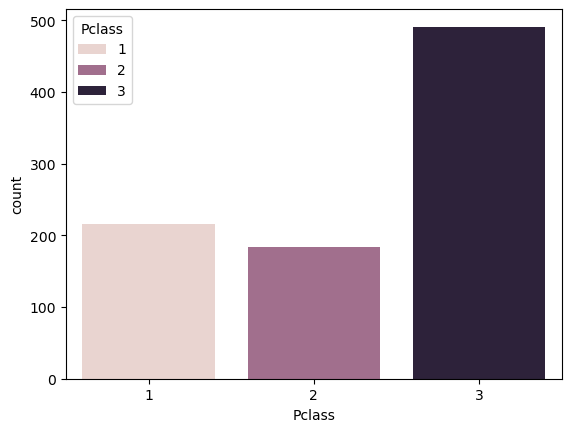

In [26]:
## Creating a count plot for PClass columns
sns.countplot(x='Pclass',data=titanic_df,hue='Pclass')

<Axes: xlabel='Pclass', ylabel='count'>

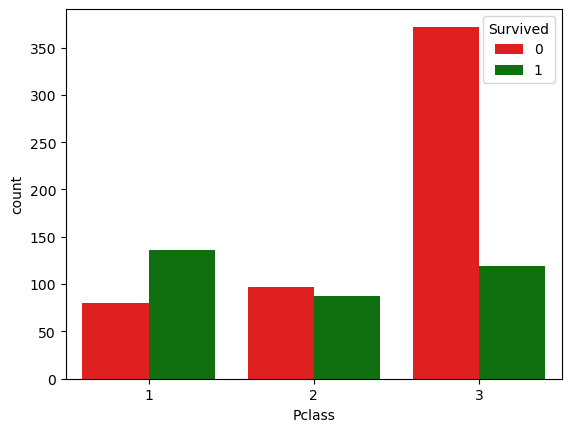

In [27]:
## Number of Survivers by Pclass wise
sns.countplot(x='Pclass',data=titanic_df,hue='Survived',palette=['r','g'])

In [28]:
print('Pclass 1 survivors above age 60:', 
      round(len(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Age'] > 59) & (titanic_df['Survived'] == True)]) / 
            len(titanic_df[(titanic_df['Pclass'] == 1) & (titanic_df['Age'] > 59)]) * 100, 1), 
      '%')
print('Pclass 2 survivors above age 60:', 
      round(len(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Age'] > 59) & (titanic_df['Survived'] == True)]) / 
            len(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Age'] > 59)]) * 100, 1), 
      '%')

print('Pclass 3 survivors above age 60:', 
      round(len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Age'] > 59) & (titanic_df['Survived'] == True)]) / 
            len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Age'] > 59)]) * 100, 1), 
      '%')


Pclass 1 survivors above age 60: 29.4 %
Pclass 2 survivors above age 60: 25.0 %
Pclass 3 survivors above age 60: 20.0 %


In [29]:
print('Pclass1 survivors between 20-30 Age:',round(len(titanic_df[(titanic_df['Pclass']==1) \
    &(titanic_df['Age']>19) & (titanic_df['Age']<31) & (titanic_df['Survived']==True)])/len( \
    titanic_df[(titanic_df['Pclass']==1) & (titanic_df['Age']>19) \
    & (titanic_df['Age']<31)])*100,1),'%')
print('Pclass2 survivors between 20-30 Age:',round(len(titanic_df[(titanic_df['Pclass']==2) \
    &(titanic_df['Age']>19) & (titanic_df['Age']<31) & (titanic_df['Survived']==True)])/len( \
    titanic_df[(titanic_df['Pclass']==2) & (titanic_df['Age']>19) \
    & (titanic_df['Age']<31)])*100,1),'%')
print('Pclass3 survivors between 20-30 Age:',round(len(titanic_df[(titanic_df['Pclass']==3) \
    &(titanic_df['Age']>19) & (titanic_df['Age']<31) & (titanic_df['Survived']==True)])/len( \
    titanic_df[(titanic_df['Pclass']==3) & (titanic_df['Age']>19) \
    & (titanic_df['Age']<31)])*100,1),'%')

Pclass1 survivors between 20-30 Age: 61.4 %
Pclass2 survivors between 20-30 Age: 40.3 %
Pclass3 survivors between 20-30 Age: 23.8 %


In [30]:
print('Pclass 2 adult male survivors:', 
      round(len(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Age'] > 19) & (titanic_df['Sex'] == 'male') & (titanic_df['Survived'] == True)]) / 
            len(titanic_df[(titanic_df['Pclass'] == 2) & (titanic_df['Age'] > 19) & (titanic_df['Sex'] == 'male')]) * 100, 1), 
      '%')
print('Pclass 3 adult male survivors:', 
      round(len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Age'] > 19) & (titanic_df['Sex'] == 'male') & (titanic_df['Survived'] == True)]) / 
            len(titanic_df[(titanic_df['Pclass'] == 3) & (titanic_df['Age'] > 19) & (titanic_df['Sex'] == 'male')]) * 100, 1), 
      '%')


Pclass 2 adult male survivors: 7.9 %
Pclass 3 adult male survivors: 12.3 %


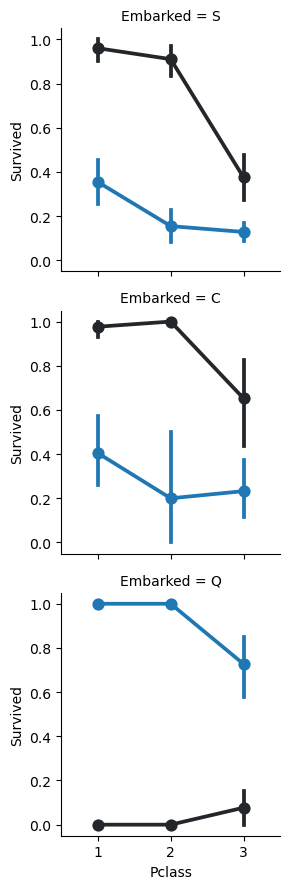

In [31]:
fg=sns.FacetGrid(titanic_df, row='Embarked')
fg.map(sns.pointplot,'Pclass','Survived','Sex')

<Figure size 640x480 with 0 Axes>

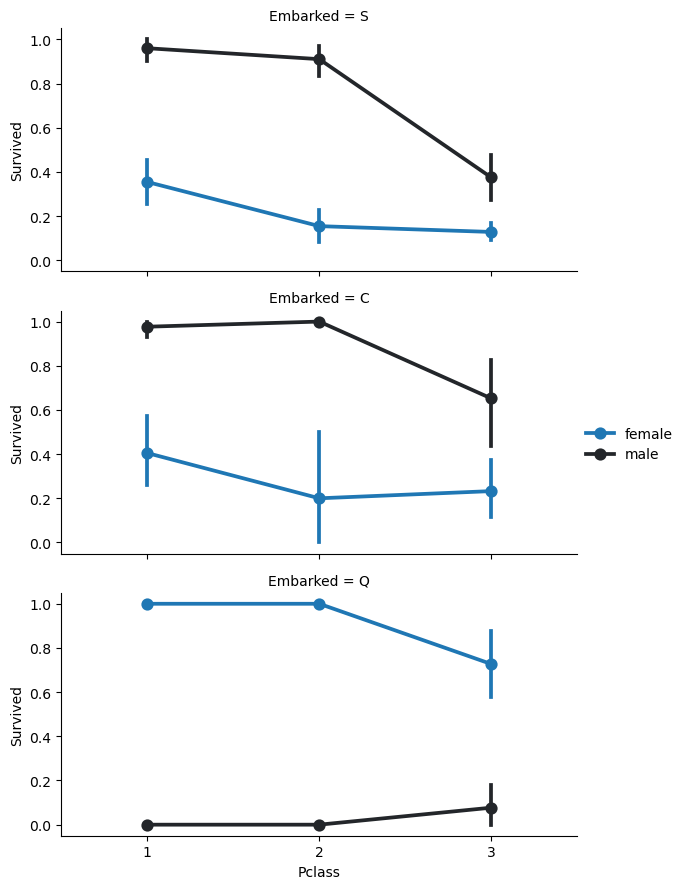

In [32]:
plt.figure()
fg=sns.FacetGrid(titanic_df, row='Embarked',aspect=2)
fg.map(sns.pointplot,'Pclass','Survived','Sex')
fg.add_legend()

<Axes: xlabel='PclassSex', ylabel='Age'>

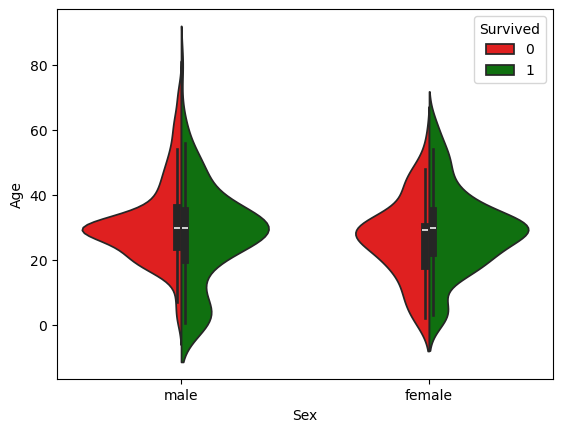

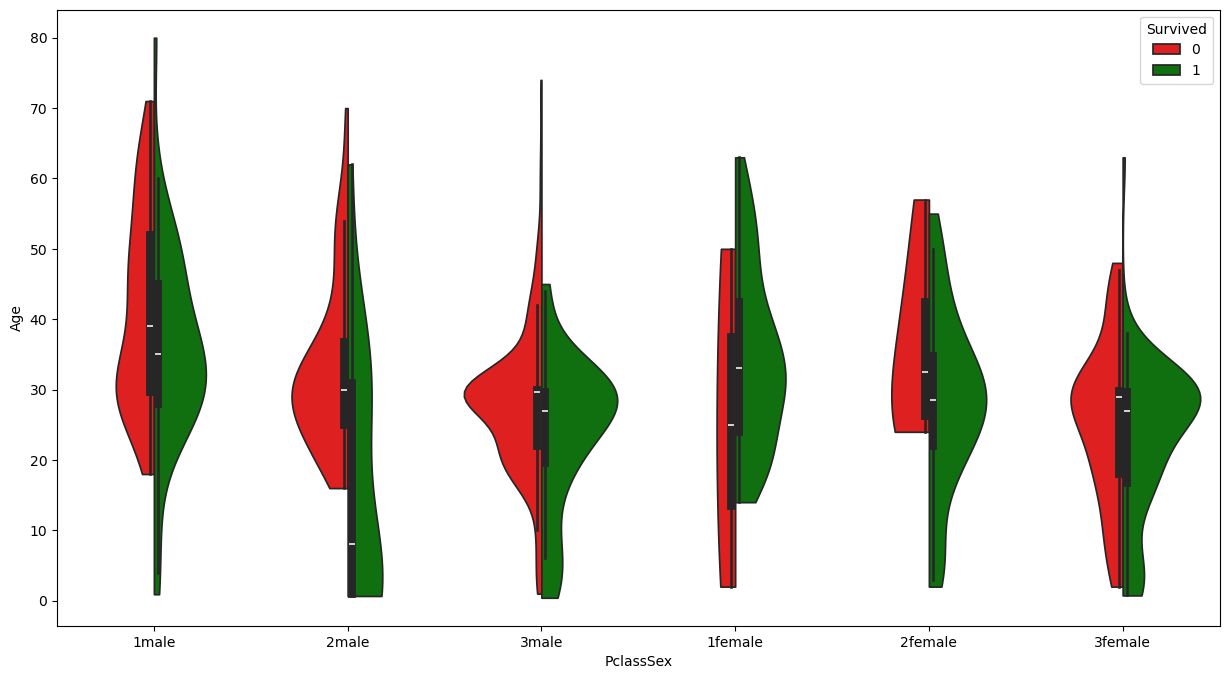

In [33]:
sns.violinplot(x='Sex', y='Age', hue='Survived', split=True, data=titanic_df, palette=["r", "g"])
titanic_df['PclassSex']=titanic_df['Pclass'].astype(str)+titanic_df['Sex']

plt.figure(figsize=(15,8))

sns.violinplot(x='PclassSex',y='Age',hue='Survived',split=True, data=titanic_df, cut=0,palette=["r","g"],order=['1male','2male','3male','1female','2female','3female'])

## Encoding the categorical columns

In [35]:
titanic_df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [36]:
titanic_df['Embarked'].value_counts()

Embarked
S    646
C    168
Q     77
Name: count, dtype: int64

In [55]:
# Converting Categorical Columns 
titanic_df.replace({'Sex':{'male':0, 'female':1}, 'Embarked':{'S':0, 'C':1, 'Q':2}}, inplace=True)

In [57]:
titanic_df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'PclassSex'],
      dtype='object')

In [59]:
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,PclassSex
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,0,3male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,1,1female
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,0,3female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,0,1female
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,0,3male


## Feature selection

In [41]:
#from sklearn.preprocessing import LabelEncoder
#le = LabelEncoder()
#titanic_df['Sex'] = le.fit_transform(titanic_df['Sex'])
#titanic_df['Embarked'] = le.fit_transform(titanic_df['Embarked'])


In [42]:
X=titanic_df.drop(columns=['PassengerId','Name','Ticket','Survived'],axis=1)
Y=titanic_df['Survived']

In [43]:
print(X)

     Pclass  Sex        Age  SibSp  Parch     Fare  Embarked PclassSex
0         3    0  22.000000      1      0   7.2500         0     3male
1         1    1  38.000000      1      0  71.2833         1   1female
2         3    1  26.000000      0      0   7.9250         0   3female
3         1    1  35.000000      1      0  53.1000         0   1female
4         3    0  35.000000      0      0   8.0500         0     3male
..      ...  ...        ...    ...    ...      ...       ...       ...
886       2    0  27.000000      0      0  13.0000         0     2male
887       1    1  19.000000      0      0  30.0000         0   1female
888       3    1  29.699118      1      2  23.4500         0   3female
889       1    0  26.000000      0      0  30.0000         1     1male
890       3    0  32.000000      0      0   7.7500         2     3male

[891 rows x 8 columns]


In [44]:
print(Y)

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64


In [61]:
## Traing and Testing 
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [46]:
print(X.shape,X_test.shape,X_train.shape)

(891, 8) (179, 8) (712, 8)


## Model Training

In [63]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
titanic_df = pd.read_csv(r"C:\Users\evenk\OneDrive\Desktop\Code_alpha\titanic.csv")

# Check if data is loaded
print(titanic_df.head())  # Ensure DataFrame is not None

# Handle missing values
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop 'Cabin' column only if it exists
if 'Cabin' in titanic_df.columns:
    titanic_df.drop(columns=['Cabin'], inplace=True)

# Correct the replace issue
titanic_df.replace({'Sex': {'male': 0, 'female': 1}, 'Embarked': {'S': 0, 'C': 1, 'Q': 2}}, inplace=True)

# Define features and target variable
X = titanic_df.drop(columns=['PassengerId', 'Name', 'Ticket', 'Survived'], axis=1)
Y = titanic_df['Survived']

# Split dataset
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=0)

# Model training
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

model = LogisticRegression()
model.fit(X_train, Y_train)

   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                                                Name     Sex   Age  SibSp  \
0                            Braund, Mr. Owen Harris    male  22.0      1   
1  Cumings, Mrs. John Bradley (Florence Briggs Th...  female  38.0      1   
2                             Heikkinen, Miss. Laina  female  26.0      0   
3       Futrelle, Mrs. Jacques Heath (Lily May Peel)  female  35.0      1   
4                           Allen, Mr. William Henry    male  35.0      0   

   Parch            Ticket     Fare Cabin Embarked  
0      0         A/5 21171   7.2500   NaN        S  
1      0          PC 17599  71.2833   C85        C  
2      0  STON/O2. 3101282   7.9250   NaN        S  
3      0            113803  53.1000  C123        S  
4      0            373450   8.0500   NaN        S  


LogisticRegression()

In [71]:
model_pred=model.predict(X_test)

In [73]:
model_pred

array([0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0], dtype=int64)

In [83]:
accuracy=accuracy_score(model_pred,Y_test)
accuracy

0.8044692737430168

In [86]:
#Model evaluation
confusion_matrix(Y_test,model_pred)

array([[93, 17],
       [18, 51]], dtype=int64)

In [90]:

results=pd.DataFrame({
    'Model':['Logistic Regression'],
    'Score':[0.80]
})
results

,Model,Score
0,Logistic Regression,0.8


In [92]:
#To save the model in pickle file
import pickle
pickle.dump(model,open('titanic.pkl','wb'))